In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')



In [2]:
#Import the dataset
my_wine = pd.read_csv(r'/Users/ds_learner51/Downloads/das223/Classification/winequality-white.csv',delimiter=';')
my_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#display the 1st five after importing the dataset
my_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#check for shape
my_wine.shape

(4898, 12)

In [5]:
#check for null values
print(my_wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
#check for duplicates
my_wine.duplicated().sum()

937

In [7]:
#drop duplicates
my_wine=my_wine.drop_duplicates()

In [8]:
#check the shape after dropping duplicates
my_wine.shape

(3961, 12)

In [9]:
#check the description of your dataset
my_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
#check the average grouping by my target
my_wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.139869,0.382157,0.305229,4.499346,0.050059,23.127451,124.127451,0.994199,3.185425,0.476667,10.197712
5,6.921745,0.303306,0.335957,6.941532,0.052323,36.002979,150.099574,0.995072,3.171779,0.482621,9.864182
6,6.819435,0.261630,0.338227,5.959787,0.045178,35.308166,136.460850,0.993722,3.196029,0.492355,10.646122
7,6.701089,0.265363,0.327358,4.523875,0.037556,33.851234,122.052975,0.992059,3.228462,0.502859,11.515844
8,6.609924,0.286794,0.335038,5.056489,0.036756,35.618321,122.034351,0.991745,3.235115,0.485878,11.880153
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [11]:
my_wine[my_wine['quality' ]   >5].mean()


fixed acidity             6.778875
volatile acidity          0.263946
citric acid               0.335293
residual sugar            5.532357
chlorides                 0.042712
free sulfur dioxide      34.935897
total sulfur dioxide    131.899349
density                   0.993180
pH                        3.206755
sulphates                 0.494749
alcohol                  10.940254
quality                   6.369690
dtype: float64

ANALYSIS

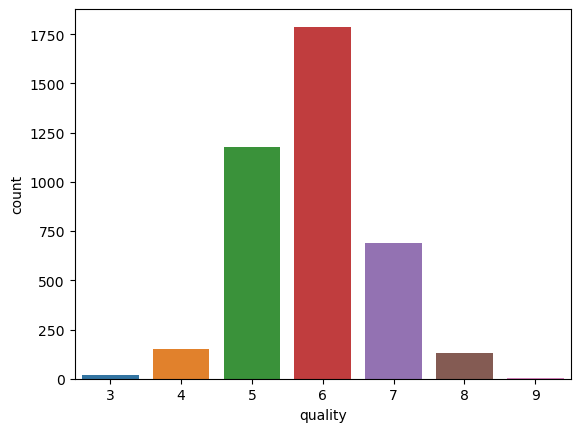

In [12]:
sns.countplot(my_wine['quality'])
plt.show()

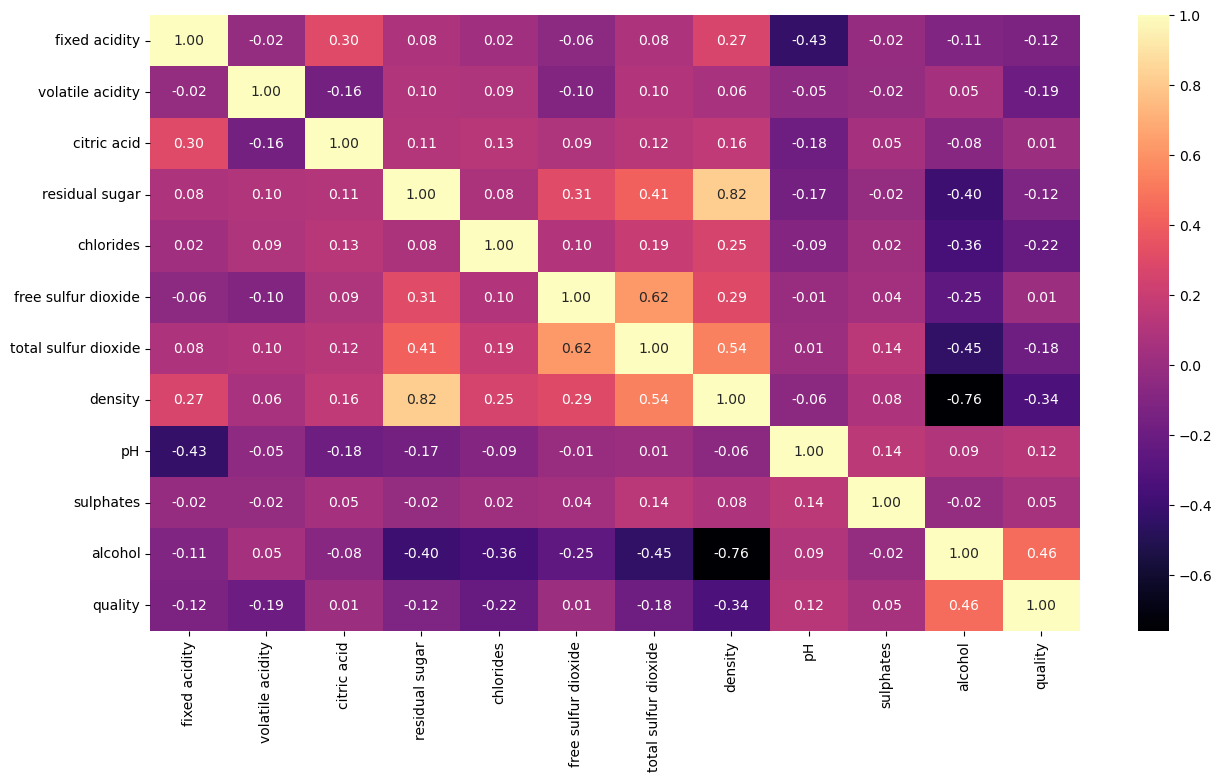

In [13]:
#corr = my_wine.corr()
#sns.heatmap(corr,annot=True)

plt.figure(figsize=(15,8))
dataplot=sns.heatmap(my_wine.corr(),annot=True,fmt='.2f',cmap='magma')
  


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

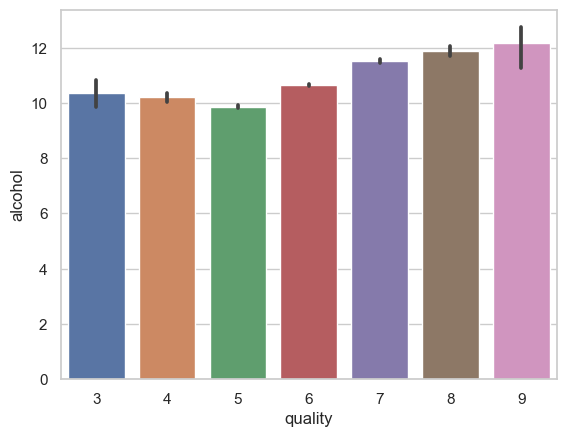

In [14]:
import seaborn
 
 
seaborn.set(style='whitegrid')
 
seaborn.barplot(x="quality",
                    y="alcohol",
                    data=my_wine)

<AxesSubplot:xlabel='alcohol', ylabel='density'>

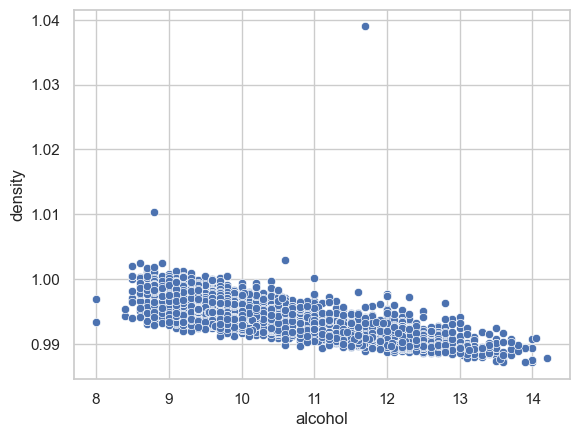

In [15]:

 
 
sns.set(style='whitegrid')
 
sns.scatterplot(x="alcohol",
                    y="density",
                    data=my_wine)

HEATMP FOR EXPRESSING CORRELATION

PAIR PLOT

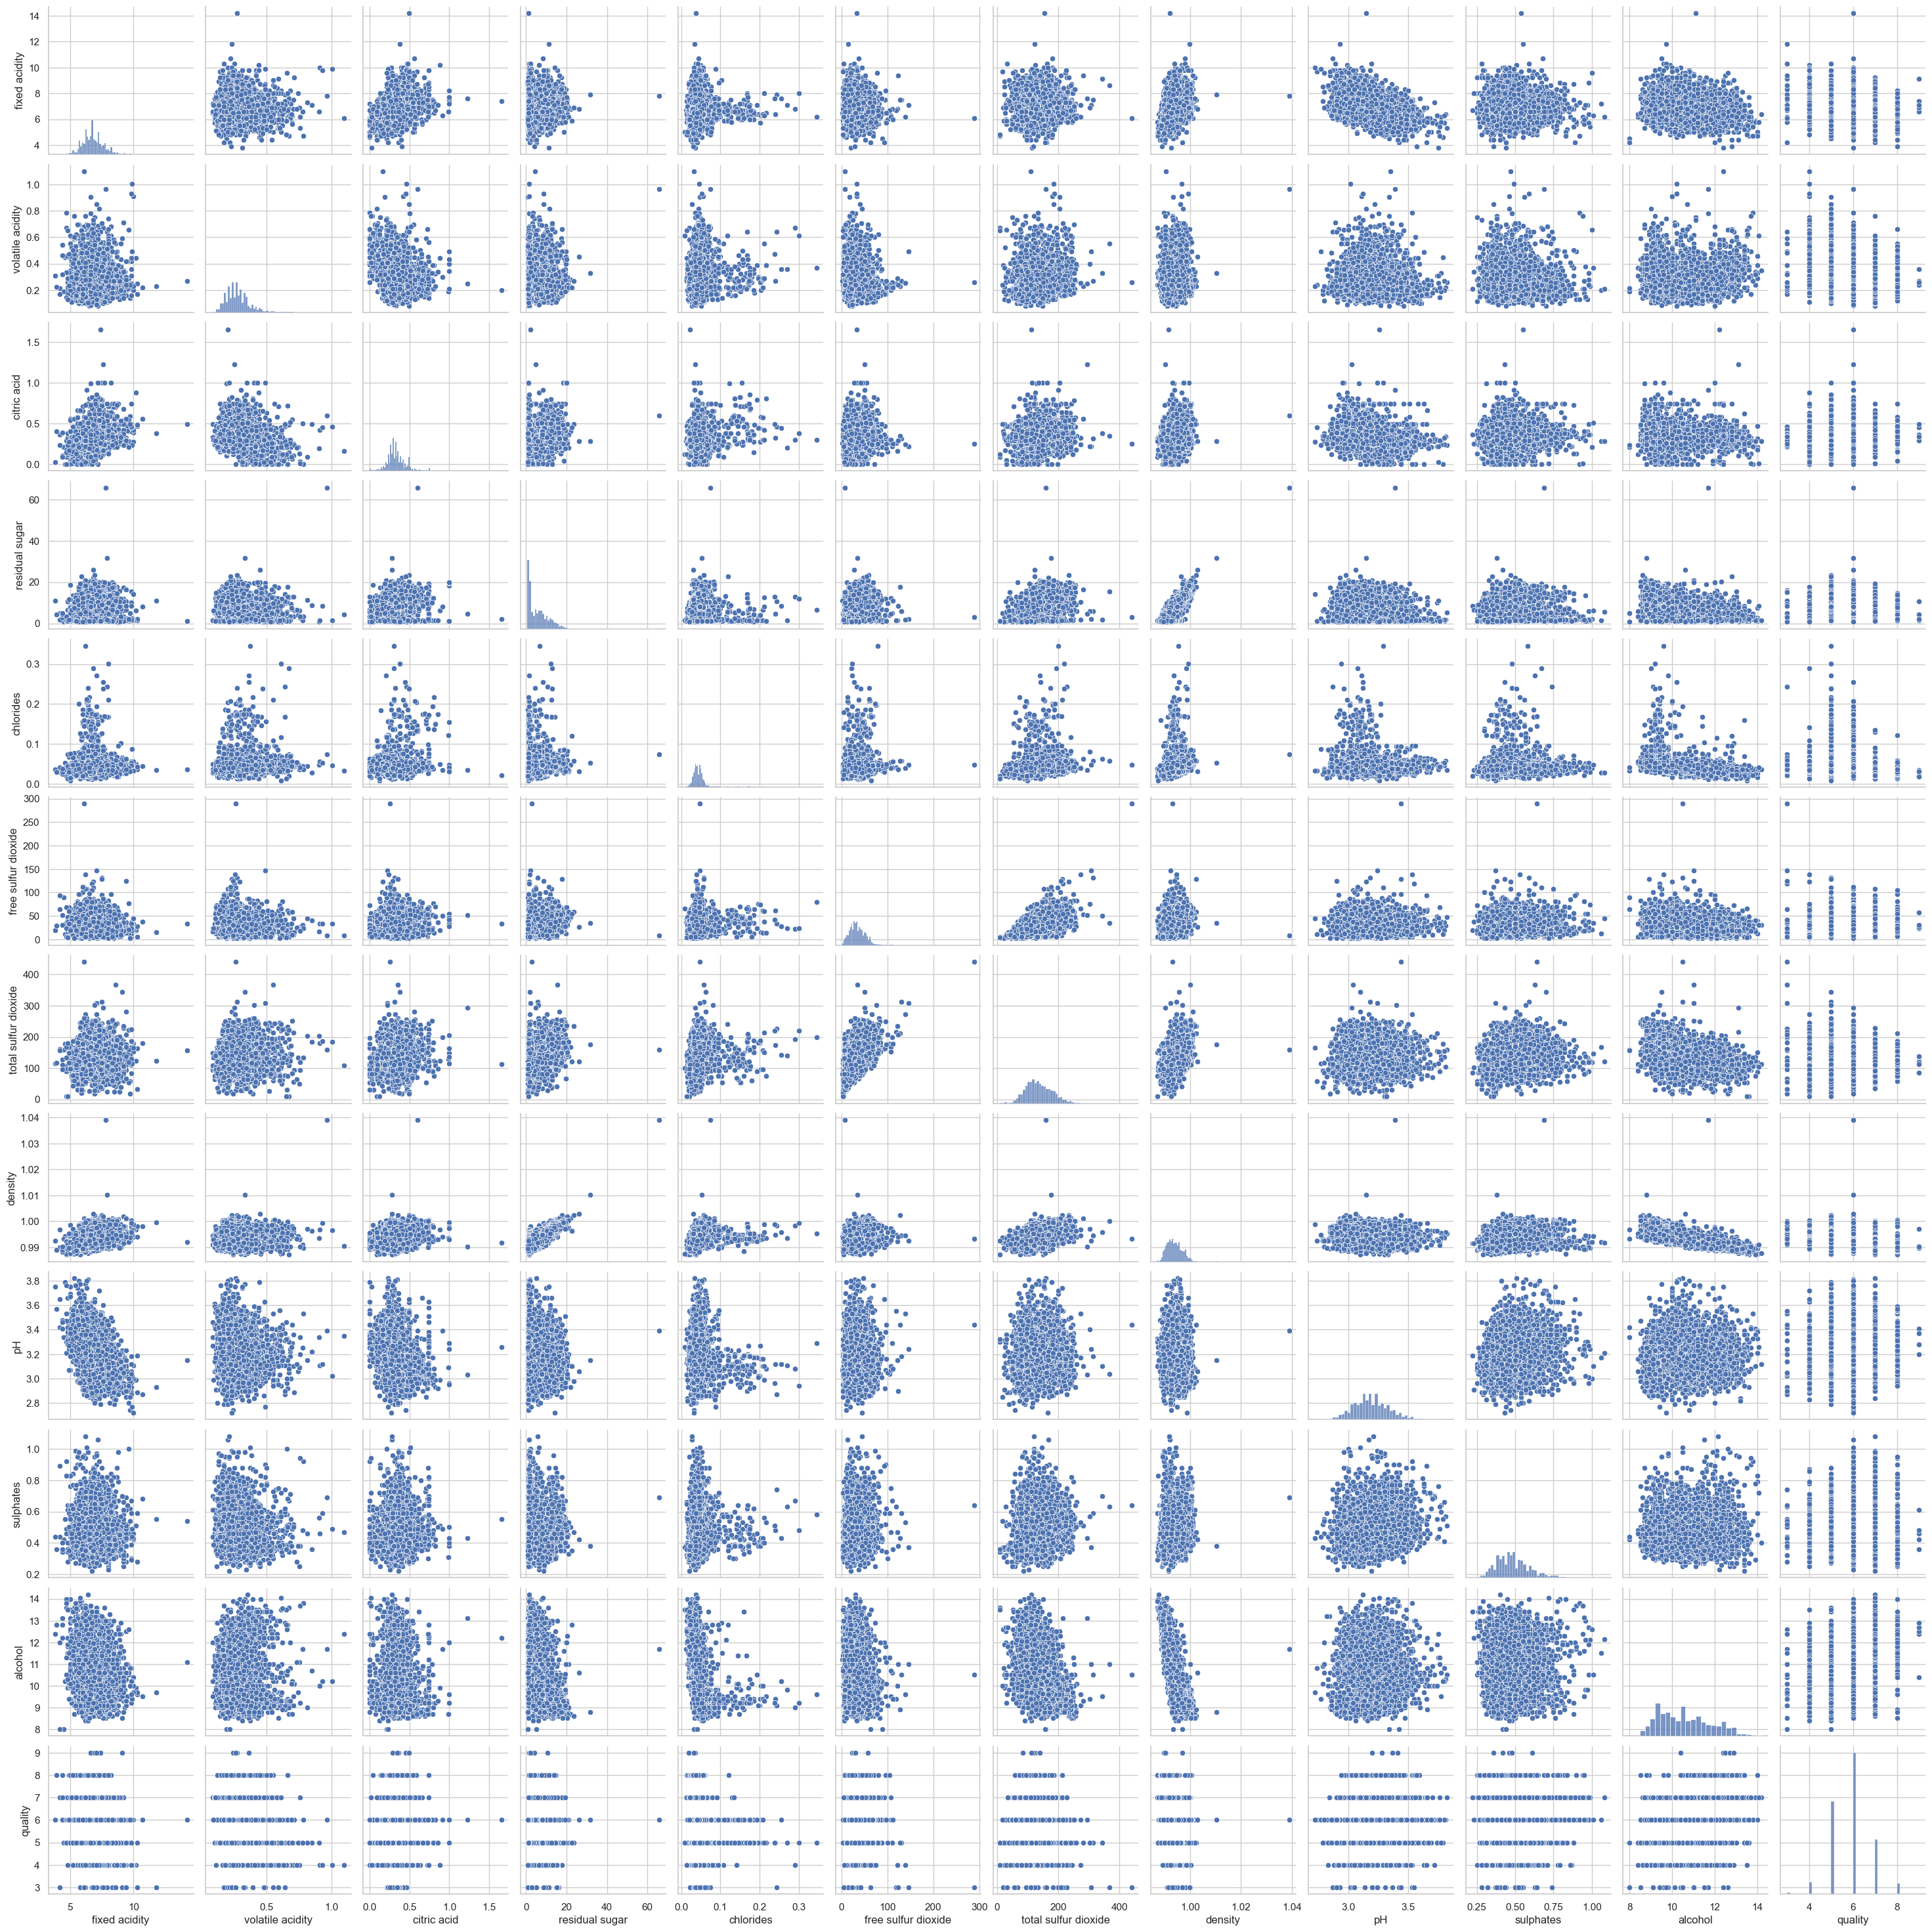

In [16]:
sns.pairplot(my_wine)

In [17]:
my_wine['wine quality'] = my_wine['quality'].apply(lambda x: 'Bad' if x<5 else 'Good' )
print(my_wine[['quality','wine quality']].value_counts().sort_index())
my_wine.head()

quality  wine quality
3        Bad               20
4        Bad              153
5        Good            1175
6        Good            1788
7        Good             689
8        Good             131
9        Good               5
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,Good


In [18]:
my_wine['wine quality'].value_counts()

Good    3788
Bad      173
Name: wine quality, dtype: int64

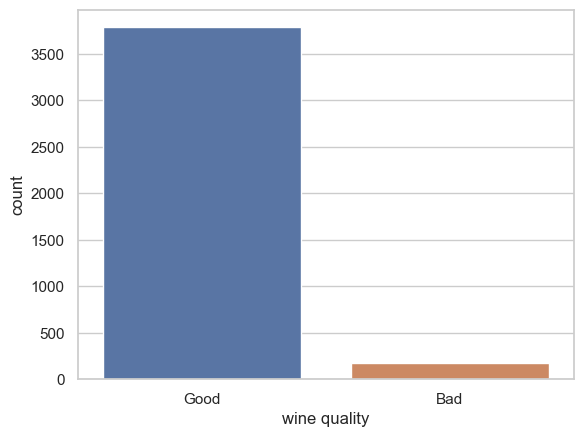

In [19]:
sns.countplot(my_wine['wine quality'])
plt.show()

<AxesSubplot:title={'center':'Relaionship between fixed acidility and pH based on wine quality'}, xlabel='pH', ylabel='fixed acidity'>

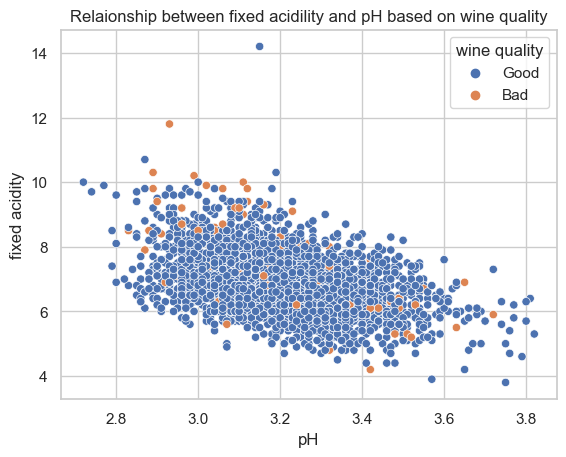

In [20]:
plt.title('Relaionship between fixed acidility and pH based on wine quality')
sns.scatterplot(data=my_wine, x="pH", y="fixed acidity", hue="wine quality")


<AxesSubplot:title={'center':'Relaionship between fixed acidility and alcohol based on wine quality'}, xlabel='alcohol', ylabel='fixed acidity'>

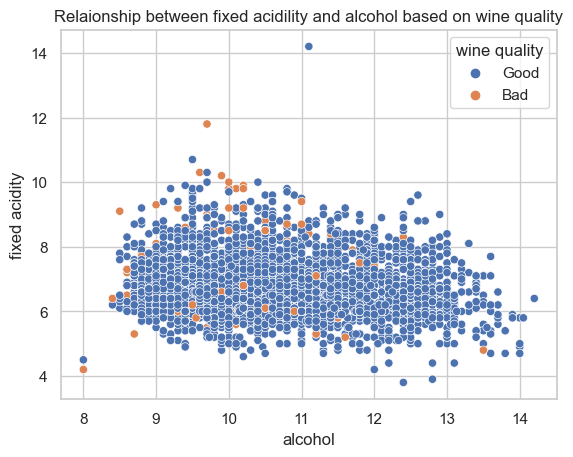

In [21]:
plt.title('Relaionship between fixed acidility and alcohol based on wine quality')
sns.scatterplot(data=my_wine, x="alcohol", y="fixed acidity", hue="wine quality")


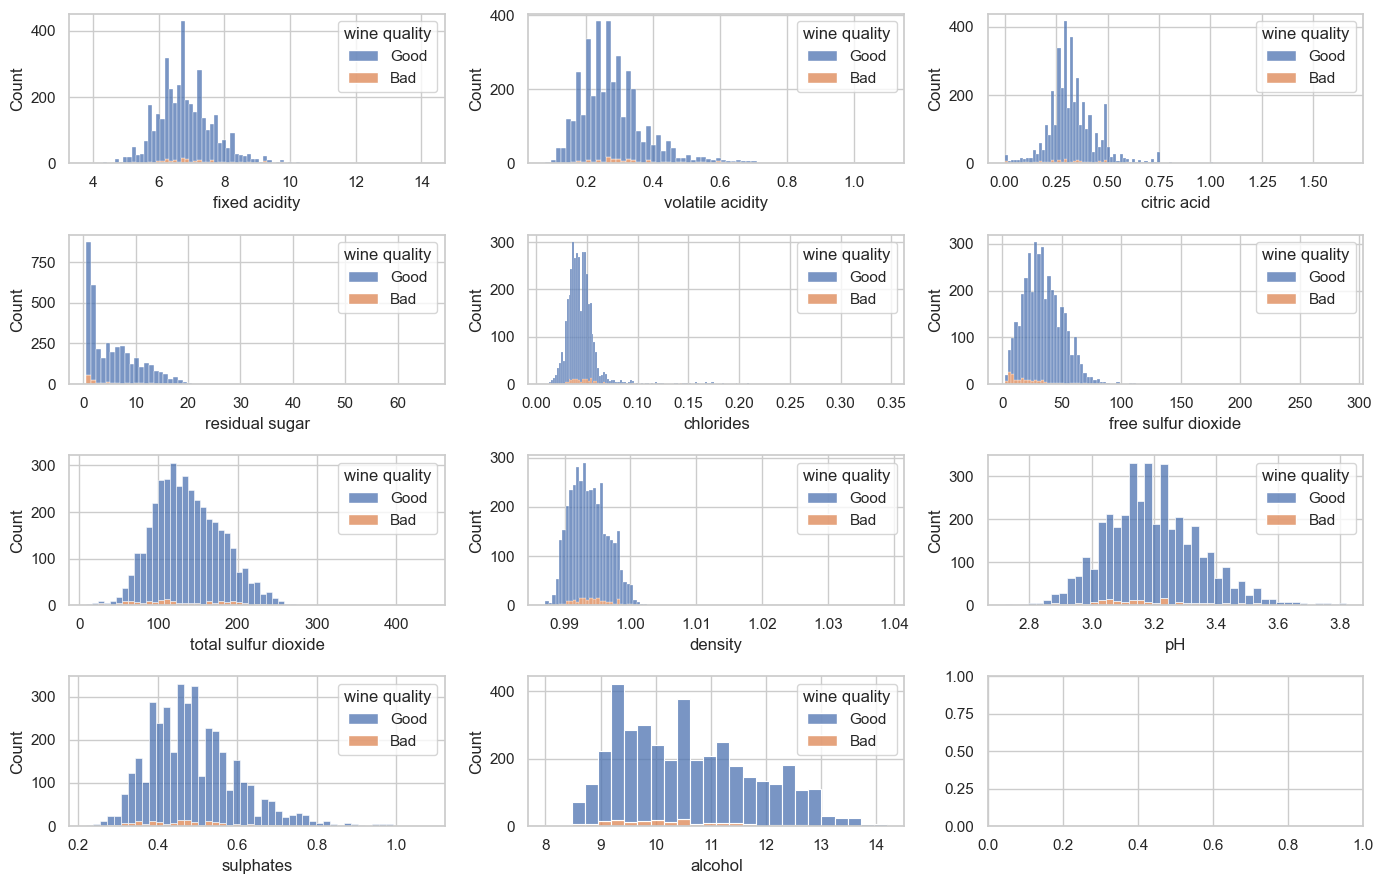

In [22]:
req_cols = my_wine.columns[:-2].values
f,ax1 = plt.subplots(4,3,figsize=(14,9))
counter=0
for r in range(4):
    for c in range(3):
        if counter >10:
            continue
        sns.histplot(data=my_wine,x=req_cols[counter],hue='wine quality',stat='count',multiple='stack',ax=ax1[r][c])
        counter+=1
f.tight_layout()

In [23]:
df=my_wine.copy()

Random under-sampling


In [24]:
my_wine['wine quality'].value_counts()


Good    3788
Bad      173
Name: wine quality, dtype: int64

In [25]:
# Class count
count_class_0, count_class_1 = my_wine['wine quality'].value_counts()

# Divide by class
df_class_0 = my_wine[my_wine['wine quality'] == 1]
df_class_1 = my_wine[my_wine['wine quality'] == 0]

In [26]:
count_class_1

173

In [27]:
count_class_0

3788

Random over-sampling

In [28]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
white_wine = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(white_wine['wine quality'].value_counts())

white_wine['wine quality'].value_counts().plot(kind='bar', title='Count (wine quality)');

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
!pip install imbalanced-learn


In [ ]:
import imblearn


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from sklearn.datasets import make_classification



In [29]:
white_wine=white_wine.drop(['quality'],axis=1)

NameError: name 'white_wine' is not defined

In [31]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

encoder = LabelEncoder()
my_wine['wine quality'] = encoder.fit_transform(my_wine['wine quality'])

X = my_wine.drop(['wine quality'],axis=1)
y = my_wine['wine quality']


In [32]:


scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.185352,-0.101889,0.209651,3.041572,-0.039181,0.587571,0.760754,2.482748,-1.289928,-0.355488,-1.470396,0.163003
1,-0.622262,0.188179,0.046294,-0.887634,0.133981,-1.213933,-0.120433,0.072470,0.689924,-0.003092,-0.895174,0.163003
2,1.454460,-0.005199,0.536367,0.202669,0.177271,-0.284124,-0.932053,0.451228,0.425944,-0.443587,-0.402127,0.163003
3,0.416099,-0.488646,-0.117064,0.531817,0.523594,0.703797,1.131781,0.623391,-0.036022,-0.795984,-0.566476,0.163003
4,-0.737636,0.381558,-1.423927,0.223241,-0.039181,-0.284124,-0.027677,0.382363,-0.102017,-0.179290,-0.813000,0.163003


SPLIT DATASET INTO TRAINING AND TEST DATA (75% / 25%)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2970, 12) (2970,) (991, 12) (991,)


FOR TEST

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_pred = model_rfc.predict(X_test)



In [35]:
X_test_prediction = model_rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [36]:
print('Accuracy:',test_data_accuracy)

Accuracy: 1.0


FOR TRAIN

In [37]:
y_pred_ = model_rfc.predict(X_train)

print('R2:',r2_score(y_train,y_pred_))
print('MSE:',mean_squared_error(y_train,y_pred_))

R2: 1.0
MSE: 0.0


In [38]:
X_train_prediction = model_rfc.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [39]:
print('Accuracy:',train_data_accuracy)

Accuracy: 1.0


In [40]:
from sklearn.metrics import confusion_matrix


Confusion matrix:
 [[ 44   0]
 [  0 947]]


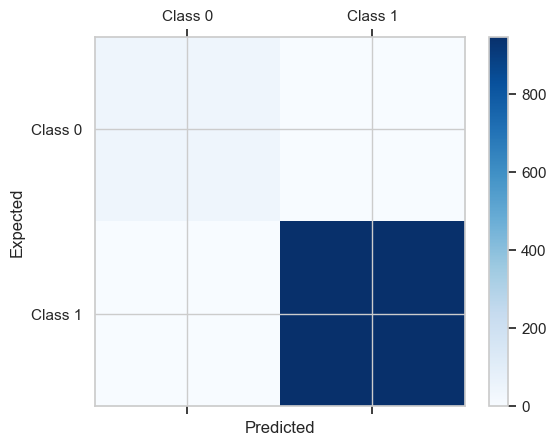

In [42]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Resampling


OVER-Smple

In [86]:
# Class count
count_class_0, count_class_1 = my_wine['wine quality'].value_counts()

# Divide by class
wine_class_0 = my_wine[my_wine['wine quality'] == 1]
wine_class_1 = my_wine[my_wine['wine quality'] == 0]

Random over-sampling:
1    3788
0    3788
Name: wine quality, dtype: int64


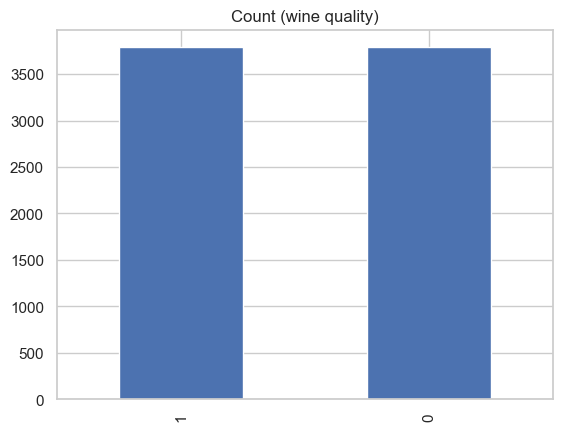

In [54]:
wine_class_1_over = wine_class_1.sample(count_class_0, replace=True)
my_wine = pd.concat([wine_class_0, wine_class_1_over], axis=0)

print('Random over-sampling:')
print(my_wine['wine quality'].value_counts())

my_wine['wine quality'].value_counts().plot(kind='bar', title='Count (wine quality)');


In [56]:
my_wine['wine quality'].value_counts()

1    3788
0    3788
Name: wine quality, dtype: int64

In [59]:
my_wine=my_wine.drop(['quality'],axis=1)
my_wine.head()

KeyError: "['quality'] not found in axis"

In [60]:
my_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [79]:
my_X=my_wine.drop(['wine quality'],axis=1)
my_y=my_wine['wine quality']

In [80]:
scaler = StandardScaler()
my_X = pd.DataFrame(scaler.fit_transform(my_X), columns=my_X.columns)
my_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.021843,-0.375483,0.268938,3.321687,-0.112104,0.523672,0.678029,2.561802,-1.163036,-0.275015,-1.424476
1,-0.681336,-0.168879,0.126681,-0.806560,0.045597,-0.630490,-0.028015,0.001778,0.683561,0.065651,-0.809667
2,1.014502,-0.306615,0.553452,0.338975,0.085023,-0.034794,-0.678319,0.404067,0.437348,-0.360182,-0.282688
3,0.166583,-0.650955,-0.015576,0.684796,0.400425,0.598134,0.975311,0.586926,0.006475,-0.700849,-0.458347
4,-0.775549,-0.031143,-1.153632,0.360589,-0.112104,-0.034794,0.046306,0.330924,-0.055078,-0.104682,-0.721837


In [81]:
X_train, X_test, y_train, y_test = train_test_split(my_X, my_y, train_size=0.75, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5682, 11) (5682,) (1894, 11) (1894,)


FOR TEST

In [82]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_pred = model_rfc.predict(X_test)

In [83]:
X_test_prediction = model_rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('accuracy for test',test_data_accuracy)

accuracy for test 0.9941921858500528


FOR TRAIN

In [84]:

y_pred = model_rfc.predict(X_train)
X_train_prediction = model_rfc.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('accuracy for train',train_data_accuracy)
print('accuracy for test',test_data_accuracy)



accuracy for train 1.0
accuracy for test 0.9941921858500528


Random under-sampling

In [ ]:
# Class count
count_class_0, count_class_1 = my_wine['wine quality'].value_counts()

# Divide by class
wine_class_0 = my_wine[my_wine['wine quality'] == 1]
wine_class_1 = my_wine[my_wine['wine quality'] == 0]

Random under-sampling:
1    173
0    173
Name: wine quality, dtype: int64


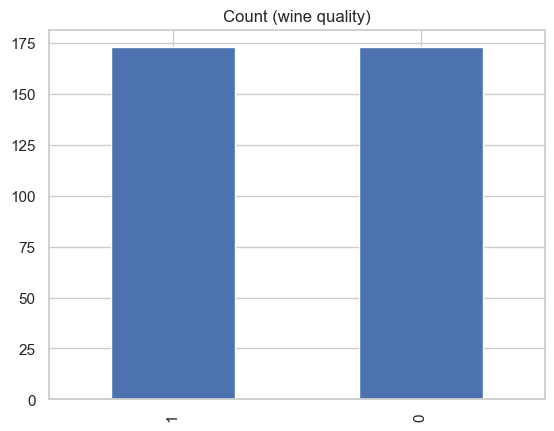

In [87]:
df_class_0_under = df_class_0.sample(count_class_1)
my_wine = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(my_wine['wine quality'].value_counts())

my_wine['wine quality'].value_counts().plot(kind='bar', title='Count (wine quality)');

FOR TEST